# Solution {-}

A classical problem in Wiener filter theory in one of separating signal from noise when both the signal and noise have exponential autocorrelation functions.

Autocorrelation:
\begin{equation}
  R_s(\tau)=\sigma_s^2 e^{-\beta_s |\tau|} \qquad
  R_n(\tau)=\sigma_n^2 e^{-\beta_n |\tau|}
\end{equation}

Spectral densities:
\begin{equation}
  S_s(j\omega)=\frac{2\sigma_s^2\beta_s}{\omega^2 + \beta_s^2} \qquad
  S_n(j\omega)=\frac{2\sigma_n^2\beta_n}{\omega^2 + \beta_n^2}
\end{equation}

Shaping filters:
\begin{equation}
  G_s(s)=\frac{\sqrt{2\sigma_s^2\beta_s}}{s + \beta_s} \qquad
  G_n(s)=\frac{\sqrt{2\sigma_n^2\beta_n}}{s + \beta_n}
\end{equation}

Differential equations:
\begin{equation}
  \dot{s} + \beta_s s = \sqrt{2\sigma_s^2\beta_s} u_s(t) \qquad
  \dot{n} + \beta_n n = \sqrt{2\sigma_n^2\beta_n} u_n(t)
\end{equation}

Matrix form:
\begin{equation}
  \begin{bmatrix}
    \dot{x_1}\\
    \dot{x_2}\\
  \end{bmatrix}
  =
  \begin{bmatrix}
    -\beta_s &0\\
    0& -\beta_n\\
  \end{bmatrix}
  \begin{bmatrix}
    x_1\\
    x_2\\
  \end{bmatrix}
  +
  \begin{bmatrix}
    \sqrt{2\sigma_s^2\beta_s}  &0\\
    0 &\sqrt{2\sigma_n^2\beta_n}\\
  \end{bmatrix}
  \begin{bmatrix}
    u_s(t)\\
    u_n(t)\\
  \end{bmatrix}
\end{equation}

In [1]:
from sympy import Matrix, symbols, sqrt, eye, inverse_laplace_transform, integrate

s, t, beta_s, beta_n, sigma_s, sigma_n = symbols('s t beta_s beta_n sigma_s sigma_n', positive=True)

# Dynamic matrix
F = Matrix([[-beta_s, 0],
            [0, -beta_n]])

# Dynamic matrix
G = Matrix([[sqrt(2*sigma_s**2*beta_s), 0],
            [0, sqrt(2*sigma_n**2*beta_n)]])

# Transition matrix
phi = inverse_laplace_transform((s*eye(2)-F).inv(), s, t)
display(phi)

# Process noise matrix
Q = integrate(phi@G@G.T@phi.T, (t, 0, t))
display(Q)

Matrix([
[exp(-beta_s*t),              0],
[             0, exp(-beta_n*t)]])

Matrix([
[sigma_s**2 - sigma_s**2*exp(-2*beta_s*t),                                        0],
[                                       0, sigma_n**2 - sigma_n**2*exp(-2*beta_n*t)]])

## Simulation

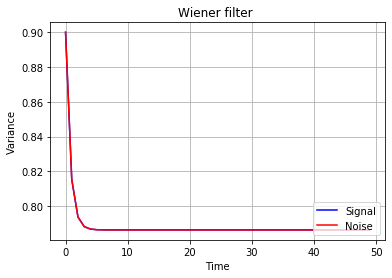

In [3]:
from numpy import array, exp, sqrt, eye, arange
from numpy.linalg import inv
from vanloan import numeval
import matplotlib.pyplot as plt

# System values
samples = 50
sigmas = 3
sigman = 1
betas = 0.1  # 1/second
betan = 1    # 1/second
dt = 1       # second

# Dynamics matrix
F = array([[-betas, 0],
           [0, -betan]])

# Spectral coefficients
G = array([[sqrt(2*sigmas**2*betas), 0],
           [0, sqrt(2*sigman**2*betan)]])

# Numerical evaluation
[phi, Q] = numeval(F, G, dt)

# Initial values
P = array([[sigmas**2, 0],
           [0, sigman**2]])

# Design matrix
H = array([[1, 1]])

# Measurement noise
R = array([[0]])

# Plot vectors
vars = []
varn = []

# Main loop
for i in range(0, samples):
    
    # Time update
    P = phi@P@phi.T + Q
    
    # Gain
    K = P@H.T@inv(H@P@H.T + R)
    
    # State covariance matrix update
    P = (eye(2) - K@H)@P@(eye(2) - K@H).T + K@R@K.T
    
    # Error variance
    vars.append(P[0, 0])
    varn.append(P[1, 1])

# Time
time = arange(0, samples)

# Plotting process
plt.figure(1)
plt.plot(time, vars, 'b', label='Signal')
plt.plot(time, varn, 'r', label='Noise')
plt.title('Wiener filter ')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.legend(loc='lower right')
plt.grid(True, which='both')
plt.show()

